# 0. Présentation  

## Prédiction du Churn Client dans le Secteur des Télécommunications

### Introduction

Dans un secteur des télécommunications hautement concurrentiel, **la fidélisation des clients est devenue un enjeu stratégique majeur**. La perte de clients, ou *churn*, représente non seulement un manque à gagner direct, mais également un coût indirect lié à l’acquisition de nouveaux abonnés. Face à cette réalité, les entreprises cherchent à anticiper les risques de résiliation pour déployer des actions de rétention ciblées.

Ce projet vise à développer un **modèle de machine learning capable de prédire avec fiabilité les clients susceptibles de résilier leur abonnement**, en s’appuyant sur des données comportementales, contractuelles et démographiques issues du jeu de données **Telco Customer Churn**.
L’objectif est de maximiser la capacité de détection des clients à risque tout en minimisant les erreurs qui pourraient conduire à des interventions inutiles sur des clients fidèles.


### **Bonne lecture**
___ 
- Lien 
    - Données : "https://www.kaggle.com/datasets/blastchar/telco-customer-churn"
    - Profil Github : "https://github.com/ange2219"
    - Profil Kaggle : "https://www.kaggle.com/angedahou"
  

# 1. Importation des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# 2. Chargement des données 

In [2]:
data = pd.read_csv('Telco_Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2.1. Description de la base de données " Telco_Customer_Churn "

La base de données " Telco_Customer_Churn " contient des données sur 

Les caractéristiques (variables explicatives) enregistrées pour chaque client sont les suivantes :


| Variable                   | Signification           |
|----------------------------|-------------------------|
|customerID                  | ID_Client
|gender                     | Sexe
|SeniorCitizen  |  Senior |
|Partner |Partenaire|
|Dependents | Personnes_à_charge | 
|tenure | Ancienneté | 
|PhoneService | Téléphone |
|MultipleLines'|  Lignes_multiples|
|InternetService|Type_Internet|
|OnlineSecurity|Sécurité_Internet|
|OnlineBackup|Sauvegarde_En_Ligne|
|DeviceProtection|Protection_Appareils| 
|TechSupport |Assistance_Technique|
|StreamingTV |Streaming_TV|
|StreamingMovies|Streaming_Films|
|Contract|Type_Contrat|
|PaperlessBilling|Facture_Électronique|
|PaymentMethod|Mode_Paiement|
|MonthlyCharges|Facture_Mensuelle|
|TotalCharges|Total_Facturé|
|Churn|   Résiliation|




La variable cible est :
- Churn 


La base de données contient 7034 entrées (lignes) et 21 caractéristiques (colonnes).

In [5]:
# Renommer les colonnes
data.rename(columns={
    'customerID': 'ID', 
    'gender': 'sexe', 
    'SeniorCitizen': 'personne_age', 
    'Partner': 'partenaire', 
    'Dependents': 'personnes_à_charge', 
    'tenure': 'ancienneté', 
    'PhoneService': 'téléphone', 
    'MultipleLines': 'lignes_multiples', 
    'InternetService': 'type_internet', 
    'OnlineSecurity': 'sécurité_internet', 
    'OnlineBackup': 'sauvegarde_en_ligne', 
    'DeviceProtection': 'protection_appareils', 
    'TechSupport': 'assistance_technique', 
    'StreamingTV': 'streaming_TV', 
    'StreamingMovies': 'streaming_films', 
    'Contract': 'type_contrat', 
    'PaperlessBilling': 'facture_electronique', 
    'PaymentMethod': 'mode_paiement', 
    'MonthlyCharges': 'facture_mensuelle', 
    'TotalCharges': 'total_facturé', 
    'Churn': 'resiliation' 
}, inplace=True)

# Afficher les noms de colonnes mis à jour
print(data.columns)

Index(['ID', 'sexe', 'personne_age', 'partenaire', 'personnes_à_charge',
       'ancienneté', 'téléphone', 'lignes_multiples', 'type_internet',
       'sécurité_internet', 'sauvegarde_en_ligne', 'protection_appareils',
       'assistance_technique', 'streaming_TV', 'streaming_films',
       'type_contrat', 'facture_electronique', 'mode_paiement',
       'facture_mensuelle', 'total_facturé', 'resiliation'],
      dtype='object')


In [6]:
for col in data.select_dtypes('object').drop('ID', axis = 1):
    print(f"{col}")
    print(data[col].unique())

sexe
['Female' 'Male']
partenaire
['Yes' 'No']
personnes_à_charge
['No' 'Yes']
téléphone
['No' 'Yes']
lignes_multiples
['No phone service' 'No' 'Yes']
type_internet
['DSL' 'Fiber optic' 'No']
sécurité_internet
['No' 'Yes' 'No internet service']
sauvegarde_en_ligne
['Yes' 'No' 'No internet service']
protection_appareils
['No' 'Yes' 'No internet service']
assistance_technique
['No' 'Yes' 'No internet service']
streaming_TV
['No' 'Yes' 'No internet service']
streaming_films
['No' 'Yes' 'No internet service']
type_contrat
['Month-to-month' 'One year' 'Two year']
facture_electronique
['Yes' 'No']
mode_paiement
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
total_facturé
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
resiliation
['No' 'Yes']


In [7]:
data['sexe'] = data['sexe'].replace({'Female' : 'Femme', 'Male' : 'Homme'})
data['lignes_multiples'] = data['lignes_multiples'].replace({'No phone service' : 'Pas de service tel'})
data['type_internet'] = data['type_internet'].replace({'Fiber optic' : 'Fibre optique'})
data['sécurité_internet'] = data['sécurité_internet'].replace({'No internet service' : 'Pas de service net'})
data['sauvegarde_en_ligne'] = data['sauvegarde_en_ligne'].replace({'No internet service' : 'Pas de service net'})
data['protection_appareils'] = data['protection_appareils'].replace({'No internet service' : 'Pas de service net'})
data['assistance_technique'] = data['assistance_technique'].replace({'No internet service' : 'Pas de service net'})
data['streaming_TV'] = data['streaming_TV'].replace({'No internet service' : 'Pas de service net'})
data['streaming_films'] = data['streaming_films'].replace({'No internet service' : 'Pas de service net'})
data['type_contrat'] = data['type_contrat'].replace({'Month-to-month' : 'Mensuel', 'One year' : 'Annuel', 'Two year': 'Deux ans'})
data['mode_paiement'] = data['mode_paiement'].replace({'Electronic check' : 'Cheque electronique', 'Mailed check' : 'Cheque papier', 'Bank transfer (automatic)': 'Transfere bancaire (auto)', 'Credit card (automatic)': 'Carte de credit (auto)'})


In [8]:
for col in data.select_dtypes('object').drop('ID', axis = 1):
    print(f"{col}")
    print(data[col].unique())

sexe
['Femme' 'Homme']
partenaire
['Yes' 'No']
personnes_à_charge
['No' 'Yes']
téléphone
['No' 'Yes']
lignes_multiples
['Pas de service tel' 'No' 'Yes']
type_internet
['DSL' 'Fibre optique' 'No']
sécurité_internet
['No' 'Yes' 'Pas de service net']
sauvegarde_en_ligne
['Yes' 'No' 'Pas de service net']
protection_appareils
['No' 'Yes' 'Pas de service net']
assistance_technique
['No' 'Yes' 'Pas de service net']
streaming_TV
['No' 'Yes' 'Pas de service net']
streaming_films
['No' 'Yes' 'Pas de service net']
type_contrat
['Mensuel' 'Annuel' 'Deux ans']
facture_electronique
['Yes' 'No']
mode_paiement
['Cheque electronique' 'Cheque papier' 'Transfere bancaire (auto)'
 'Carte de credit (auto)']
total_facturé
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
resiliation
['No' 'Yes']


## 2.2. Qualité des données

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7043 non-null   object 
 1   sexe                  7043 non-null   object 
 2   personne_age          7043 non-null   int64  
 3   partenaire            7043 non-null   object 
 4   personnes_à_charge    7043 non-null   object 
 5   ancienneté            7043 non-null   int64  
 6   téléphone             7043 non-null   object 
 7   lignes_multiples      7043 non-null   object 
 8   type_internet         7043 non-null   object 
 9   sécurité_internet     7043 non-null   object 
 10  sauvegarde_en_ligne   7043 non-null   object 
 11  protection_appareils  7043 non-null   object 
 12  assistance_technique  7043 non-null   object 
 13  streaming_TV          7043 non-null   object 
 14  streaming_films       7043 non-null   object 
 15  type_contrat         

In [10]:
data = data[data['total_facturé']!= ' '] #Selectionner les lignes ou data['total_facturé'] n'a pas de valeurs vides
data['total_facturé'] = data['total_facturé'].astype(float)

In [11]:
data.describe()

,personne_age,ancienneté,facture_mensuelle,total_facturé
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
data.isna().sum()

ID                      0
sexe                    0
personne_age            0
partenaire              0
personnes_à_charge      0
ancienneté              0
téléphone               0
lignes_multiples        0
type_internet           0
sécurité_internet       0
sauvegarde_en_ligne     0
protection_appareils    0
assistance_technique    0
streaming_TV            0
streaming_films         0
type_contrat            0
facture_electronique    0
mode_paiement           0
facture_mensuelle       0
total_facturé           0
resiliation             0
dtype: int64

# 3. Analyse Exploratoire de données (EDA)

In [13]:
df = data.copy()

In [14]:
df.head()

,ID,sexe,personne_age,partenaire,personnes_à_charge,ancienneté,téléphone,lignes_multiples,type_internet,sécurité_internet,...,protection_appareils,assistance_technique,streaming_TV,streaming_films,type_contrat,facture_electronique,mode_paiement,facture_mensuelle,total_facturé,resiliation
0,7590-VHVEG,Femme,0,Yes,No,1,No,Pas de service tel,DSL,No,...,No,No,No,No,Mensuel,Yes,Cheque electronique,29.85,29.85,No
1,5575-GNVDE,Homme,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,Annuel,No,Cheque papier,56.95,1889.50,No
2,3668-QPYBK,Homme,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Mensuel,Yes,Cheque papier,53.85,108.15,Yes
3,7795-CFOCW,Homme,0,No,No,45,No,Pas de service tel,DSL,Yes,...,Yes,Yes,No,No,Annuel,No,Transfere bancaire (auto),42.30,1840.75,No
4,9237-HQITU,Femme,0,No,No,2,Yes,No,Fibre optique,No,...,No,No,No,No,Mensuel,Yes,Cheque electronique,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7032 non-null   object 
 1   sexe                  7032 non-null   object 
 2   personne_age          7032 non-null   int64  
 3   partenaire            7032 non-null   object 
 4   personnes_à_charge    7032 non-null   object 
 5   ancienneté            7032 non-null   int64  
 6   téléphone             7032 non-null   object 
 7   lignes_multiples      7032 non-null   object 
 8   type_internet         7032 non-null   object 
 9   sécurité_internet     7032 non-null   object 
 10  sauvegarde_en_ligne   7032 non-null   object 
 11  protection_appareils  7032 non-null   object 
 12  assistance_technique  7032 non-null   object 
 13  streaming_TV          7032 non-null   object 
 14  streaming_films       7032 non-null   object 
 15  type_contrat          7032

## 3.1. Analyse univariée

resiliation
No     5163
Yes    1869
Name: count, dtype: int64


<Axes: xlabel='resiliation', ylabel='count'>

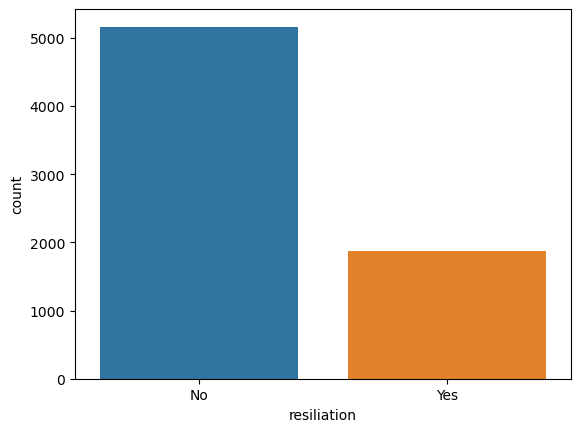

In [16]:
print(df['resiliation'].value_counts())
sns.countplot( x = df['resiliation'], hue = df['resiliation'], data = df)

In [17]:
var_cat = df.select_dtypes('object').drop(['ID', 'resiliation'], axis = 1).columns.to_list()
var_cat = var_cat + ['personne_age']
var_cat

['sexe',
 'partenaire',
 'personnes_à_charge',
 'téléphone',
 'lignes_multiples',
 'type_internet',
 'sécurité_internet',
 'sauvegarde_en_ligne',
 'protection_appareils',
 'assistance_technique',
 'streaming_TV',
 'streaming_films',
 'type_contrat',
 'facture_electronique',
 'mode_paiement',
 'personne_age']

In [18]:
var_num = df.select_dtypes('number').drop('personne_age', axis = 1).columns
var_num

Index(['ancienneté', 'facture_mensuelle', 'total_facturé'], dtype='object')

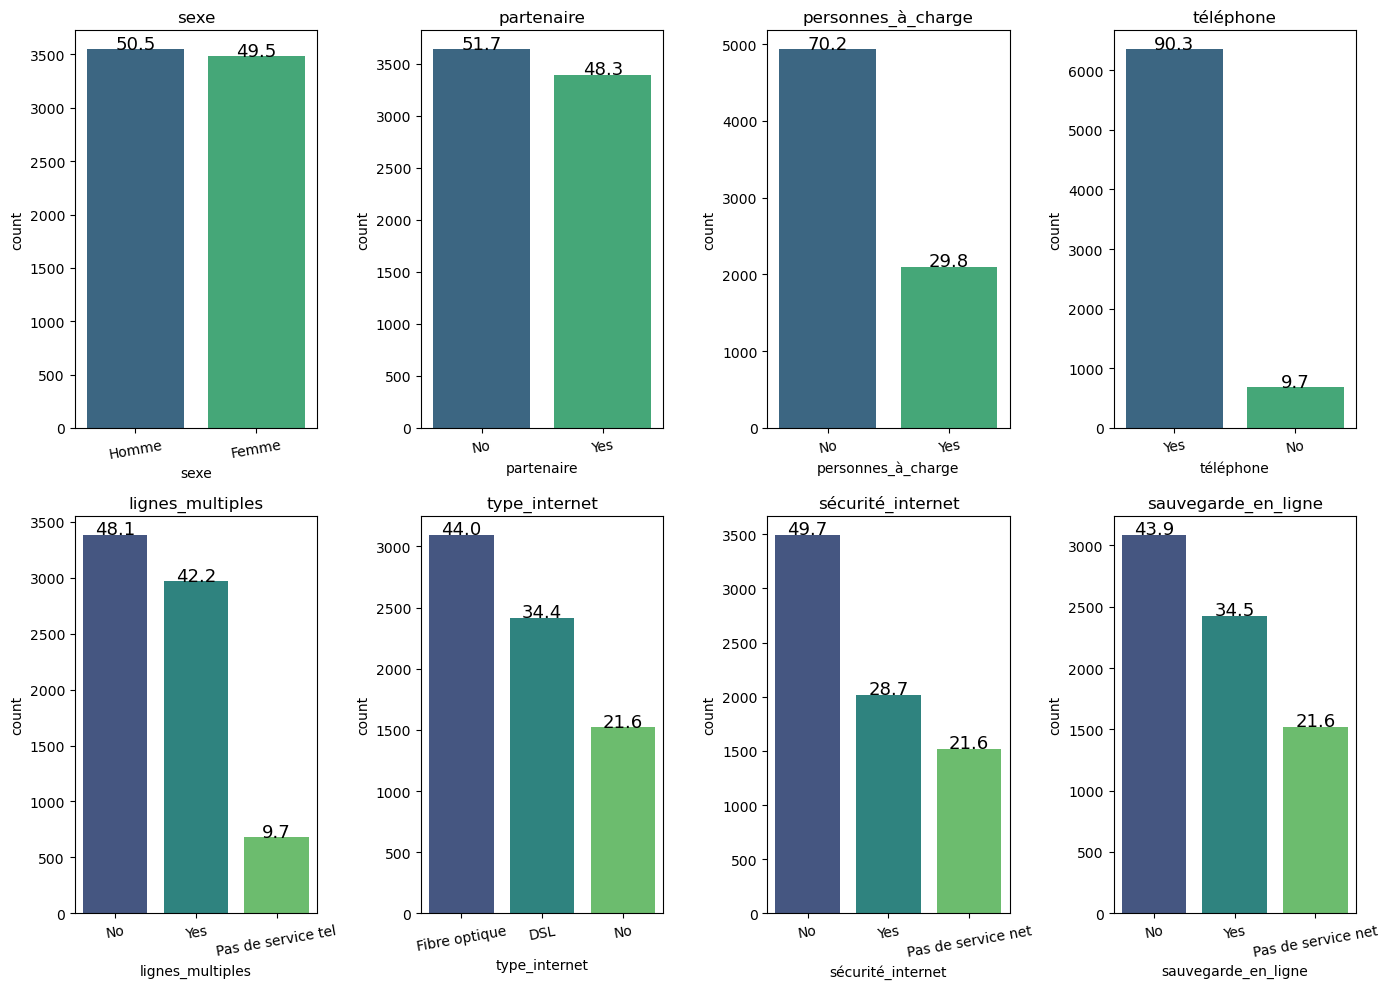

In [19]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[:8]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, palette = 'viridis', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 10)
plt.tight_layout()
plt.show()

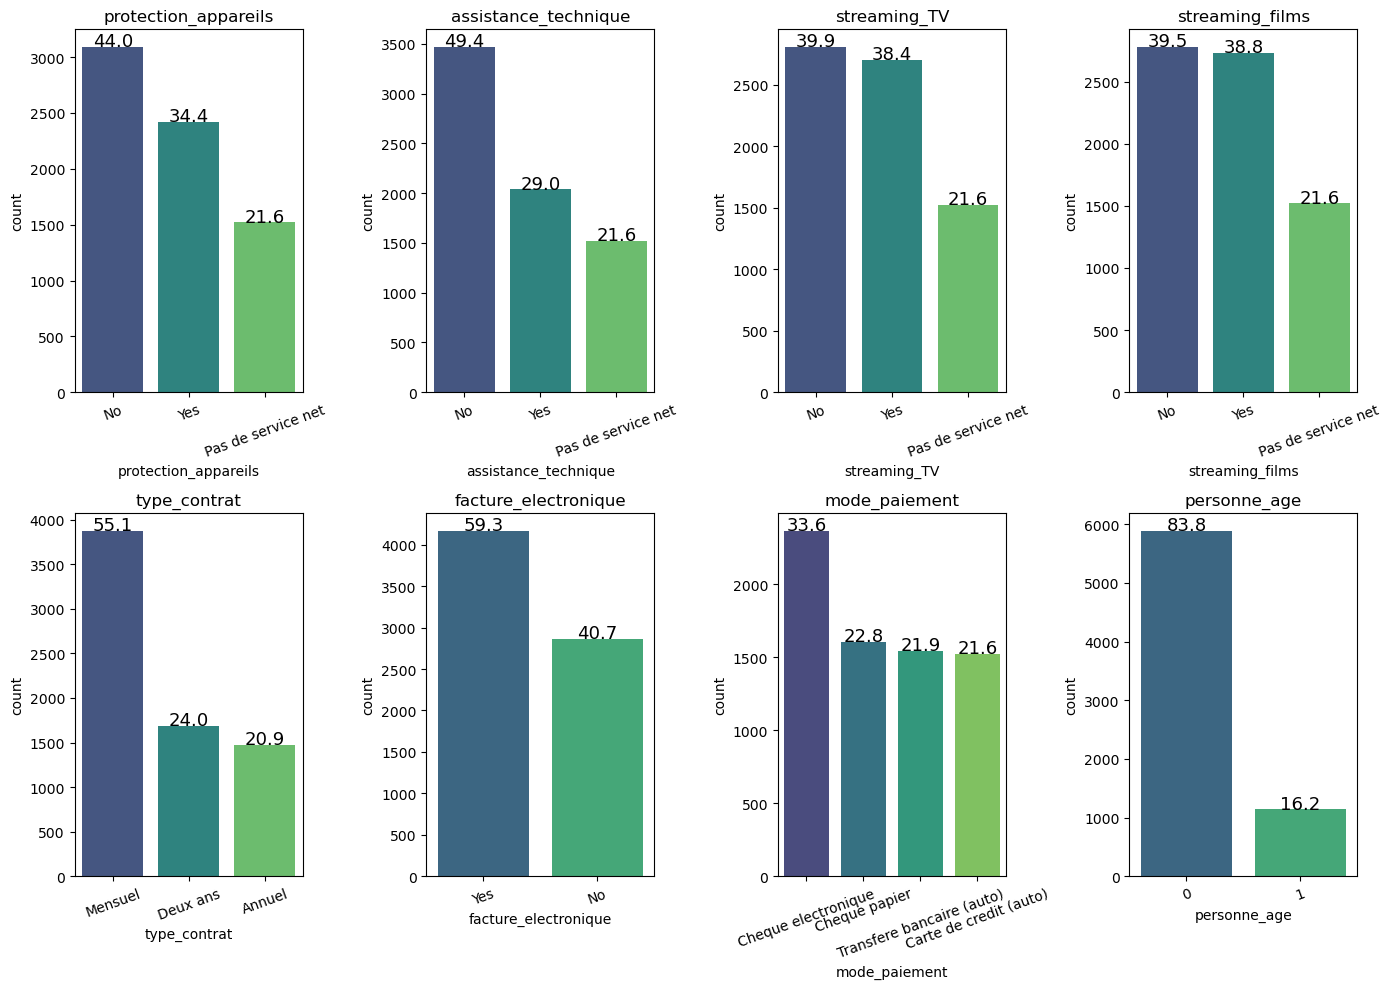

In [20]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[8:]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, palette = 'viridis', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 20)
plt.tight_layout()
plt.show()

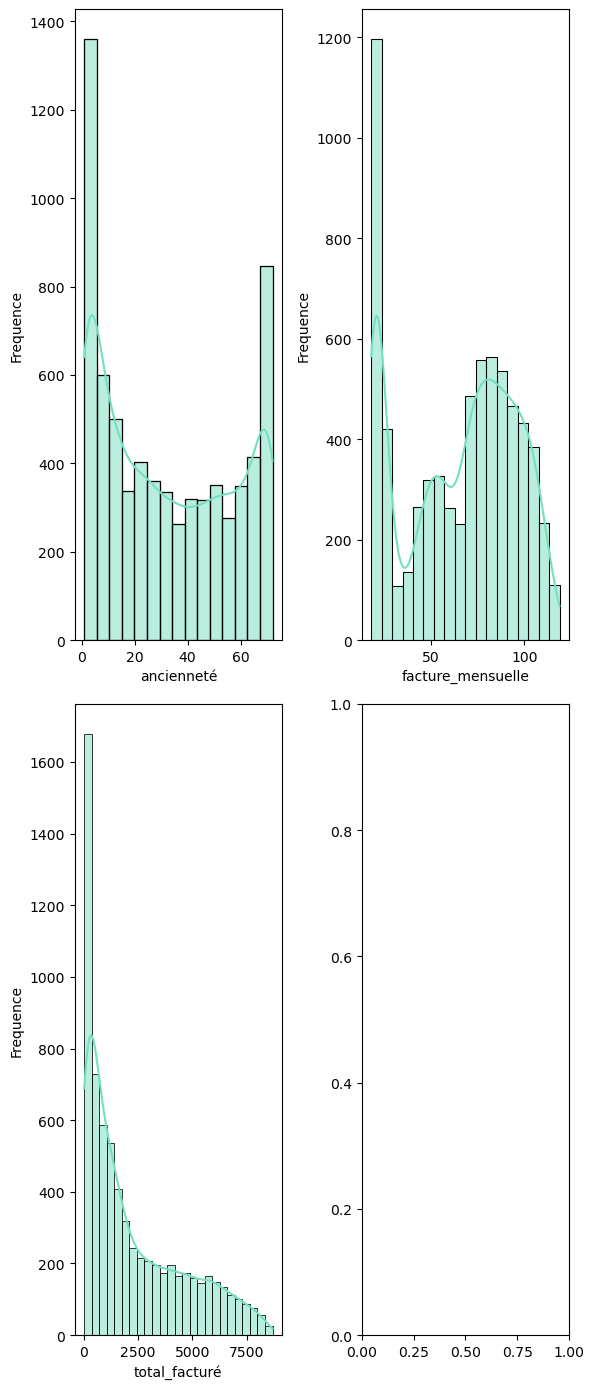

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (6, 14))
axes = axes.flatten()
for ax, col in zip(axes, var_num):
    sns.histplot(data = df[col], ax = ax, kde = True, color = '#75DFC1', edgecolor = 'black' )
    ax.set_xlabel(col)
    ax.set_ylabel('Frequence')
plt.tight_layout()
plt.show()

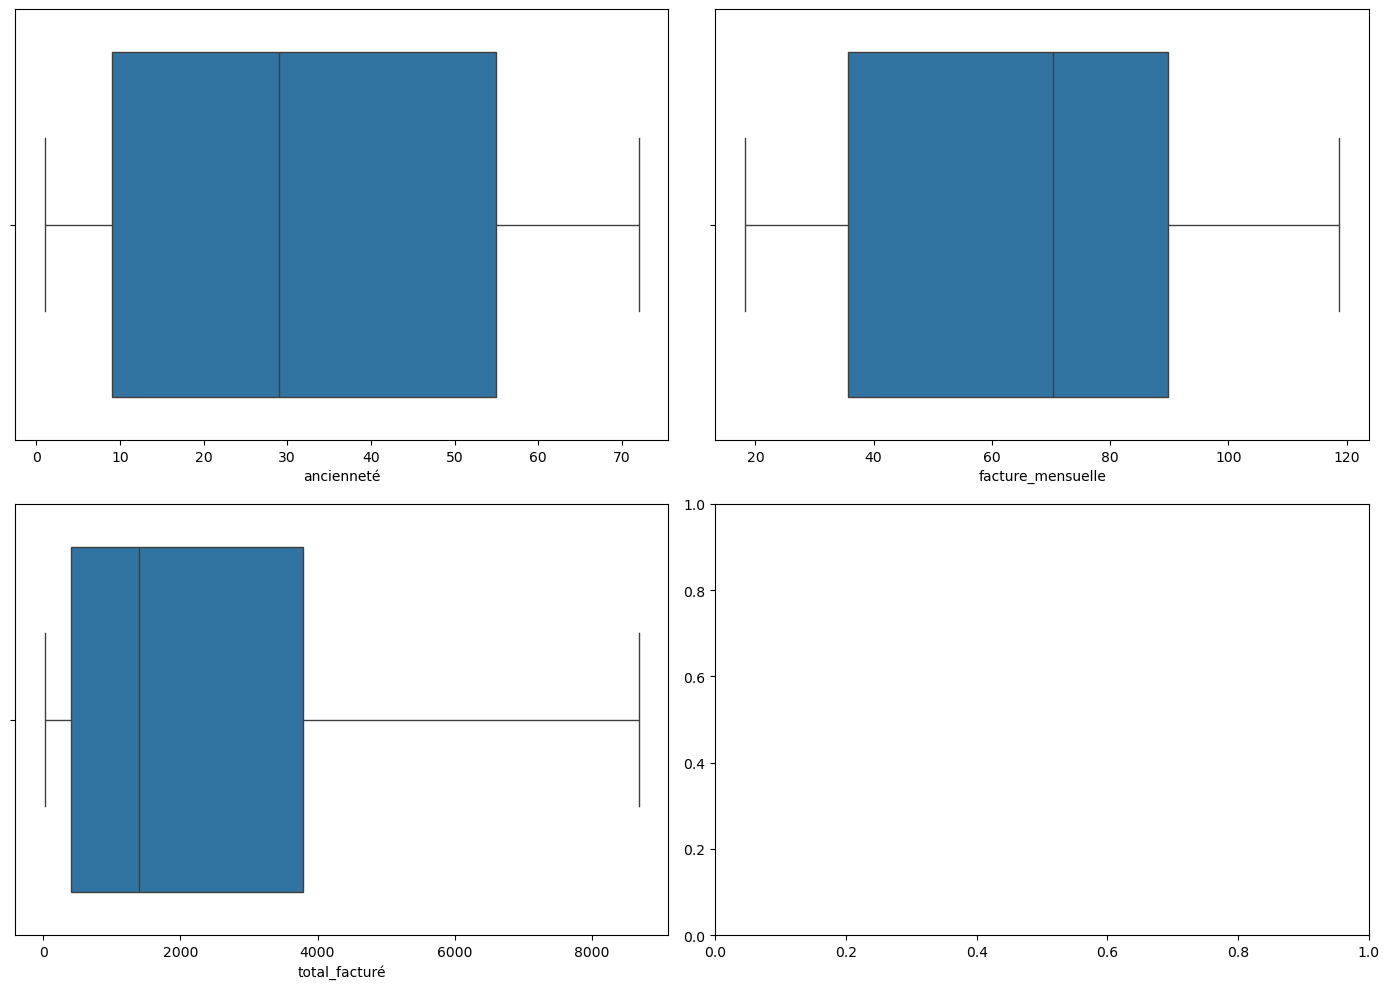

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_num):
    sns.boxplot(data = df, x = col, ax = ax)
plt.tight_layout()
plt.show()

## 3.2. Analyse bivariée

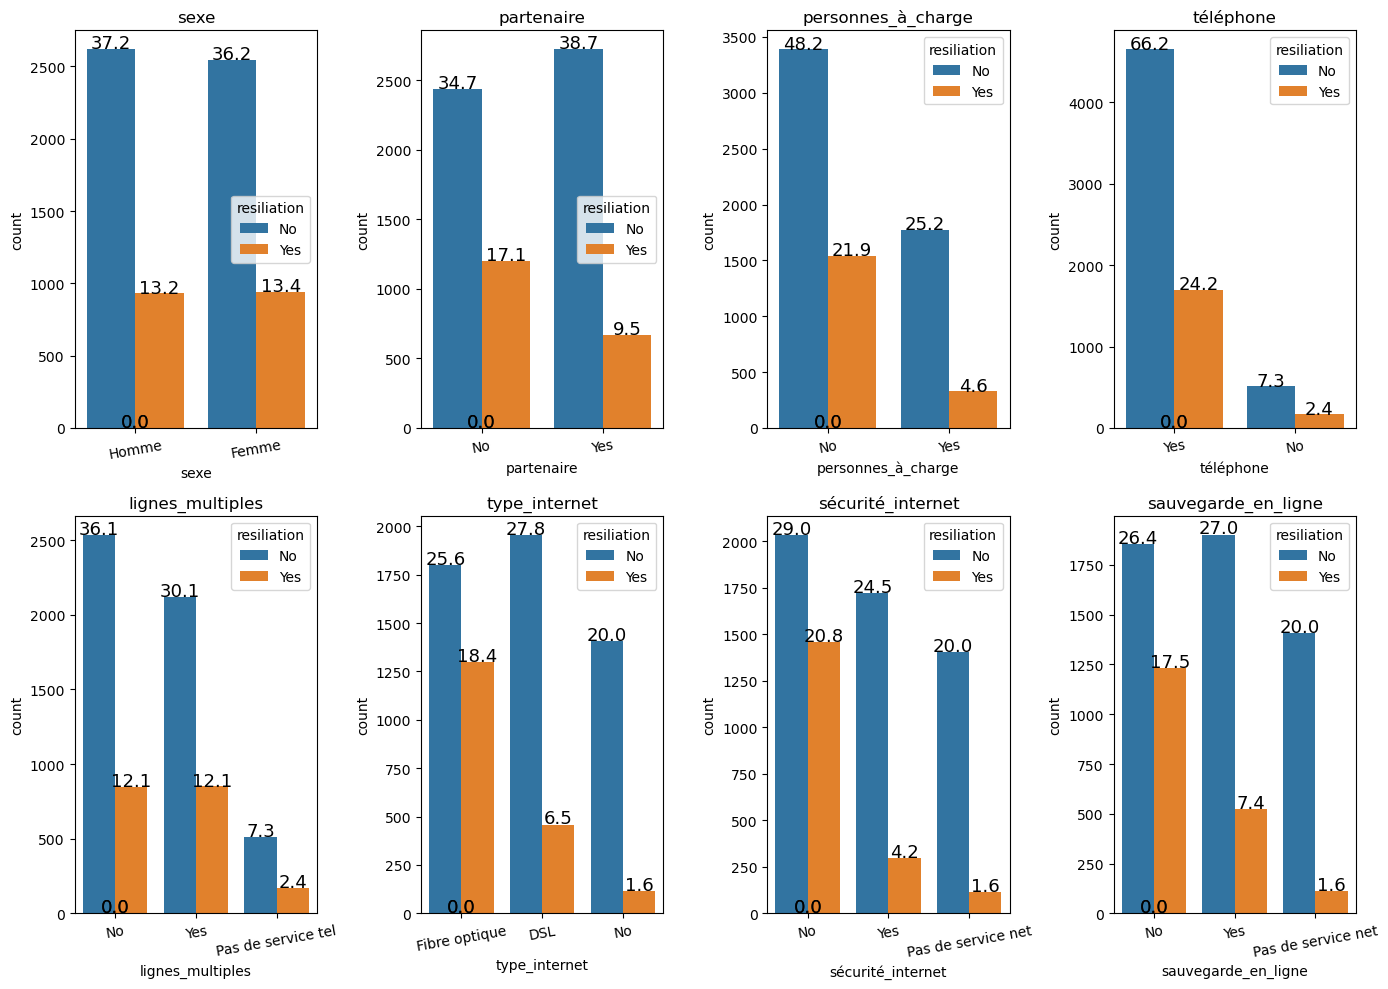

In [23]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[:8]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, hue = 'resiliation', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 10)
plt.tight_layout()
plt.show()

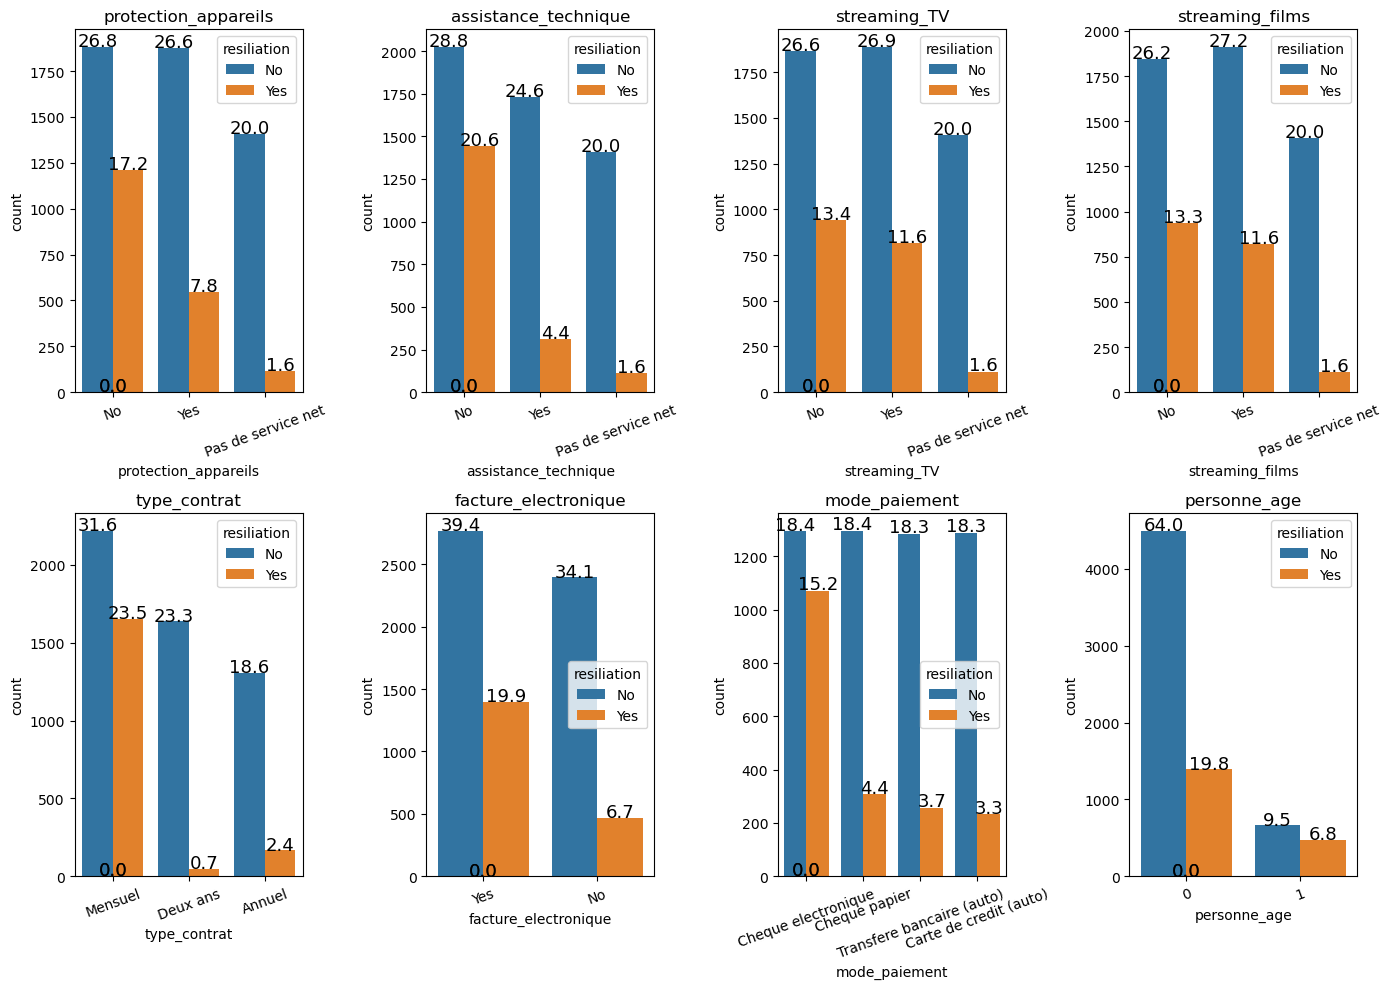

In [24]:
fig, axes = plt.subplots(2, 4, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, var_cat[8:]):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, hue = 'resiliation', order = ordre, ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}', ha = 'center', fontsize = 13)
        ax.set_title(col)
        ax.tick_params(axis = 'x', rotation = 20)
plt.tight_layout()
plt.show()

# 4. Preprocessing

In [25]:
df['sexe'].replace({'Femme': 0, 
                    'Homme' : 1}, inplace = True)

df['partenaire'].replace({'No' : 0, 
                          'Yes': 1}, inplace = True)

df['resiliation'].replace({'No' : 0, 
                          'Yes': 1}, inplace = True)

df['personnes_à_charge'].replace({'No' : 0, 
                          'Yes': 1}, inplace = True)

df['téléphone'].replace({'No' : 0, 
                         'Yes': 1}, inplace = True)

df['facture_electronique'].replace({'No' : 0, 
                                    'Yes': 1}, inplace = True)

df['type_contrat'].replace({'Mensuel' : 0, 
                            'Annuel': 1, 
                            'Deux ans' : 2}, inplace = True)

df['mode_paiement'].replace({'Cheque electronique' : 0, 
                             'Cheque papier': 1, 
                             'Transfere bancaire (auto)' : 2, 
                             'Carte de credit (auto)' : 3}, inplace = True)

df['lignes_multiples'].replace({'No' : 0, 
                                'Yes': 1, 
                                'Pas de service tel' : 2}, inplace = True)

df['type_internet'].replace({'No' : 0, 
                             'DSL': 1, 
                             'Fibre optique' : 2}, inplace = True)

dct = {'No' : 0, 'Yes': 1, 'Pas de service net' : 2}

for col in ['sécurité_internet', 'sauvegarde_en_ligne', 'protection_appareils', 'assistance_technique', 'streaming_TV', 'streaming_films']:
    df[col].replace(dct, inplace = True)

In [26]:
df.drop('ID', axis = 1, inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sexe                  7032 non-null   int64  
 1   personne_age          7032 non-null   int64  
 2   partenaire            7032 non-null   int64  
 3   personnes_à_charge    7032 non-null   int64  
 4   ancienneté            7032 non-null   int64  
 5   téléphone             7032 non-null   int64  
 6   lignes_multiples      7032 non-null   int64  
 7   type_internet         7032 non-null   int64  
 8   sécurité_internet     7032 non-null   int64  
 9   sauvegarde_en_ligne   7032 non-null   int64  
 10  protection_appareils  7032 non-null   int64  
 11  assistance_technique  7032 non-null   int64  
 12  streaming_TV          7032 non-null   int64  
 13  streaming_films       7032 non-null   int64  
 14  type_contrat          7032 non-null   int64  
 15  facture_electronique  7032

In [28]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
print(df.duplicated().sum())

22
0


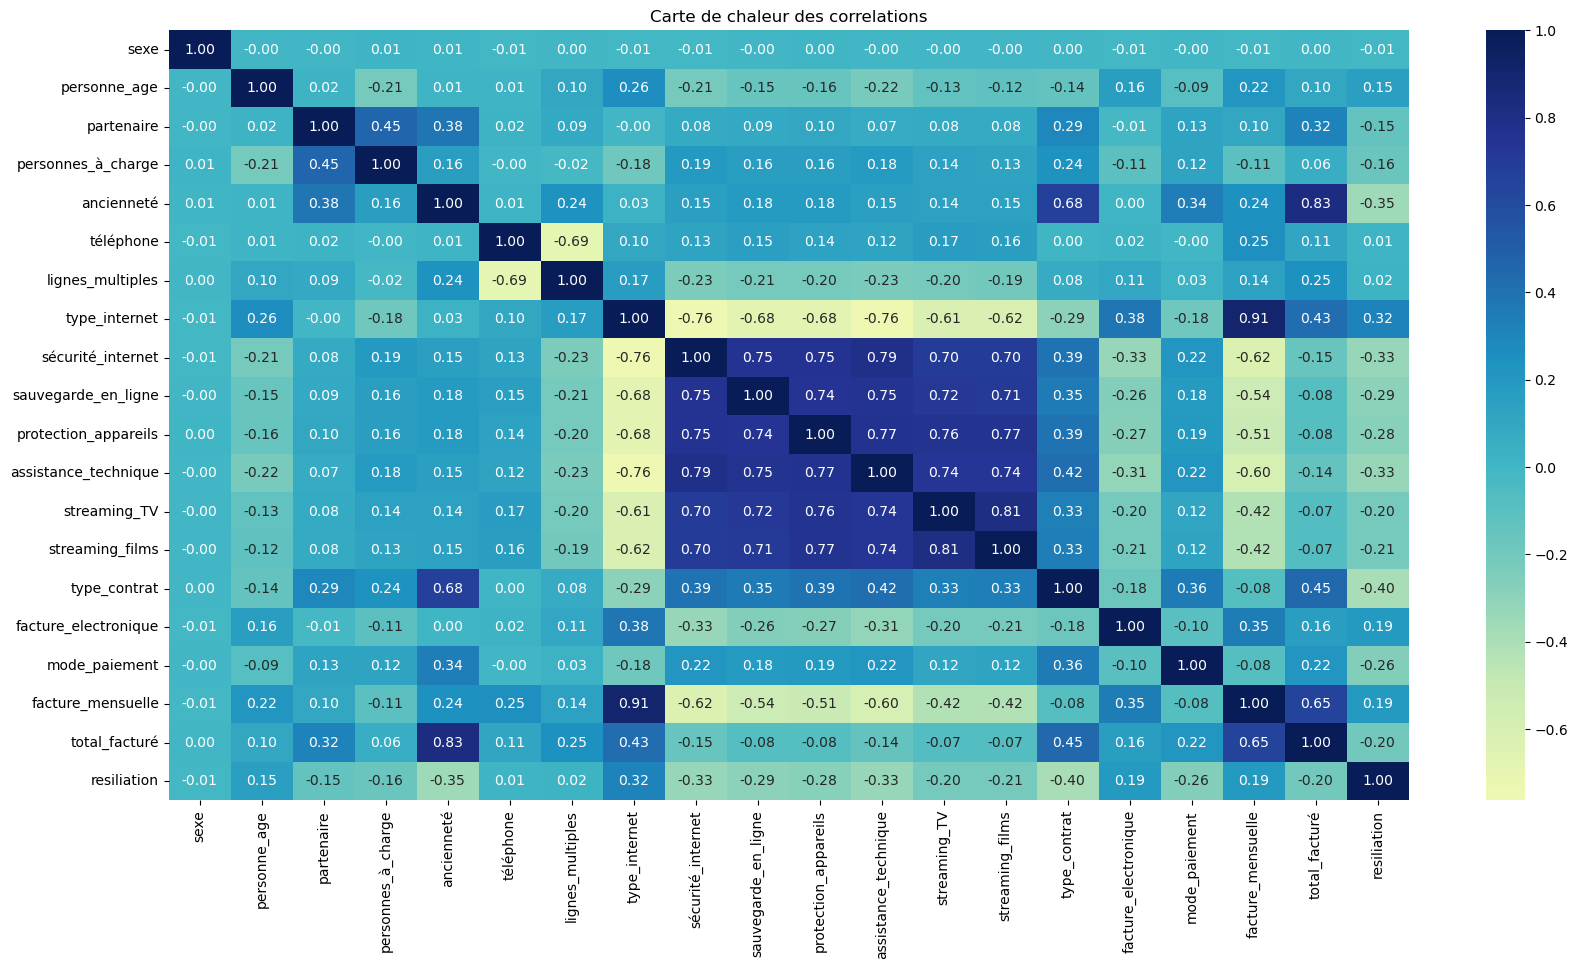

In [29]:
corr_matrix = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'YlGnBu', center = 0)
plt.title('Carte de chaleur des correlations')
plt.show()

# 5. Modelisation 

In [30]:
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
seed = 42

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [32]:
X = df.drop('resiliation', axis = 1)
X_scaled = mm_scaler.fit_transform(X)
y = df['resiliation']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed, stratify = y)

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state = seed)

X_train_down, y_train_down = rus.fit_resample(X_train, y_train)

In [35]:
X_train_down = pd.DataFrame(X_train_down, columns = X.columns)
y_train_down = pd.DataFrame(y_train_down)

In [36]:
y_train_down.value_counts()

resiliation
0              1486
1              1486
Name: count, dtype: int64

In [37]:
def evaluation(model, X_train, y_train):
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 5, 
                                                      scoring = 'f1', train_sizes = np.linspace(0.1, 1,5), n_jobs=-1)
    plt.figure(figsize = (12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val_score')
    plt.show()

In [38]:
XGBClassifier = XGBClassifier (n_estimators = 20, random_state = seed)
AdaBoostClassifier = AdaBoostClassifier(n_estimators = 20, random_state = seed)
RandomForestClassifier = RandomForestClassifier(n_estimators = 20, random_state = seed)
DecisionTreeClassifier = DecisionTreeClassifier(random_state = seed)
LogisticRegression = LogisticRegression(random_state = seed)
KNeighborsClassifier = KNeighborsClassifier()
SVC = SVC(random_state = seed)

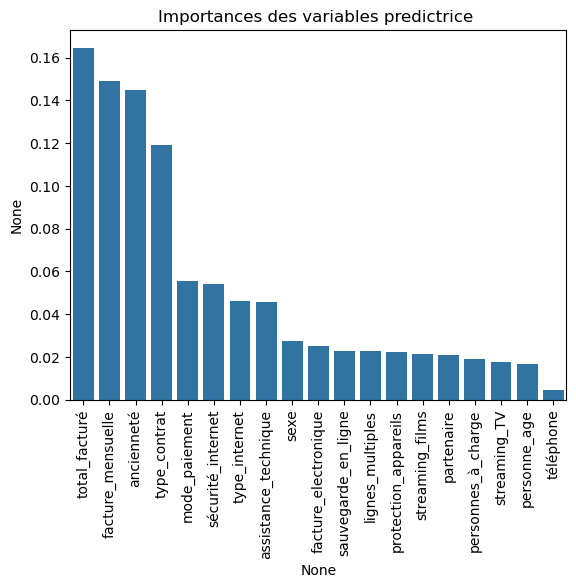

In [39]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
rfc = RandomForestClassifier(random_state = seed)
rfc.fit(X_train_down, y_train_down)
var_imp = pd.Series(rfc.feature_importances_, df.drop('resiliation', axis = 1).columns).sort_values(ascending = False)
sns.barplot(x = var_imp.index, y = var_imp)
plt.xticks(rotation = 90)
plt.xlabel = ('Variables')
plt.ylabel = ('Score')
plt.title('Importances des variables predictrice ')
plt.show()

In [40]:
var_imp

total_facturé           0.164641
facture_mensuelle       0.148998
ancienneté              0.145004
type_contrat            0.119095
mode_paiement           0.055675
sécurité_internet       0.054307
type_internet           0.046309
assistance_technique    0.045593
sexe                    0.027265
facture_electronique    0.024921
sauvegarde_en_ligne     0.022938
lignes_multiples        0.022694
protection_appareils    0.022207
streaming_films         0.021536
partenaire              0.020930
personnes_à_charge      0.019123
streaming_TV            0.017594
personne_age            0.016769
téléphone               0.004399
dtype: float64

In [41]:
dicts_of_models = {#'XGB':XGBClassifier, 
                   #'AdaBoostClassifier':AdaBoostClassifier, 
                   #'RandomForestClassifier':RandomForestClassifier, 
                   #'DecisionTreeClassifier':DecisionTreeClassifier, 
                   'LogisticRegression':LogisticRegression,
                   #'KNeighborsClassifier':KNeighborsClassifier, 
                   #'SVC':SVC
                   }

LogisticRegression
[[749 282]
 [ 76 295]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1031
           1       0.51      0.80      0.62       371

    accuracy                           0.74      1402
   macro avg       0.71      0.76      0.71      1402
weighted avg       0.80      0.74      0.76      1402



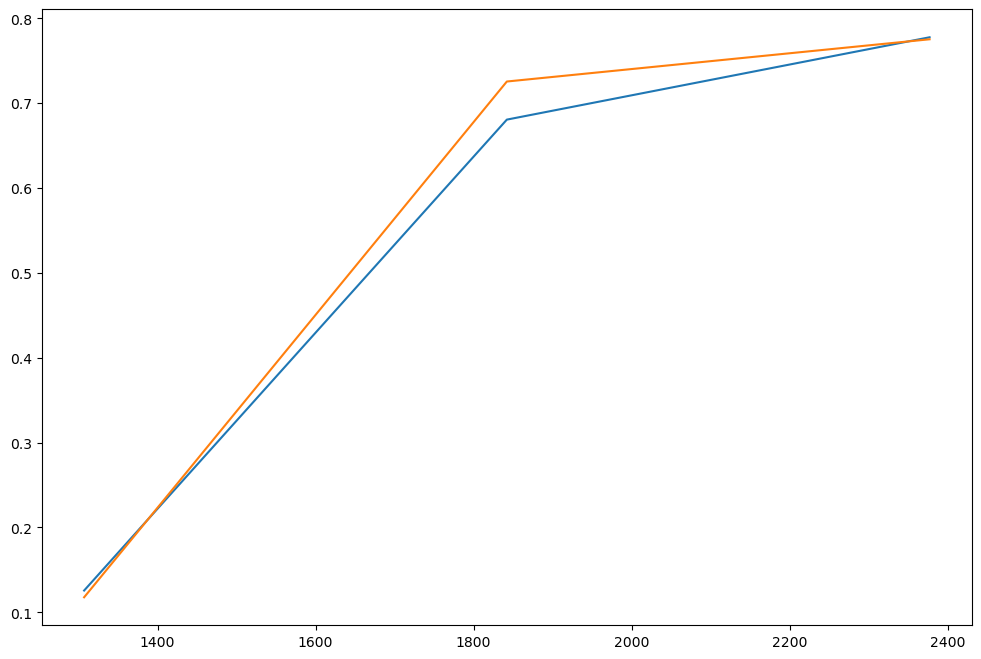

In [42]:
for name, model in dicts_of_models.items():
    print(name)
    evaluation(model, X_train_down, y_train_down)

# 6. Optimisation

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = seed, class_weight = 'balanced')

In [44]:
param_grid = {'C' : [0.01, 0.1, 1, 10],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'max_iter': [100, 500, 1000],
             'solver': ['saga'],
              'l1_ratio' : [0, 0.5, 1]}
grid_search = GridSearchCV(estimator = lr,
                          param_grid = param_grid,
                          scoring = 'f1',
                          cv = 5,
                          )

grid_search.fit(X_train_down, y_train_down)
print('Meilleur score CV:', grid_search.best_score_)
print('Meilleur parametre:', grid_search.best_params_)

model_grid = grid_search.best_estimator_

Meilleur score CV: 0.7787110244624137
Meilleur parametre: {'C': 10, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


[[754 277]
 [ 77 294]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1031
           1       0.51      0.79      0.62       371

    accuracy                           0.75      1402
   macro avg       0.71      0.76      0.72      1402
weighted avg       0.80      0.75      0.76      1402



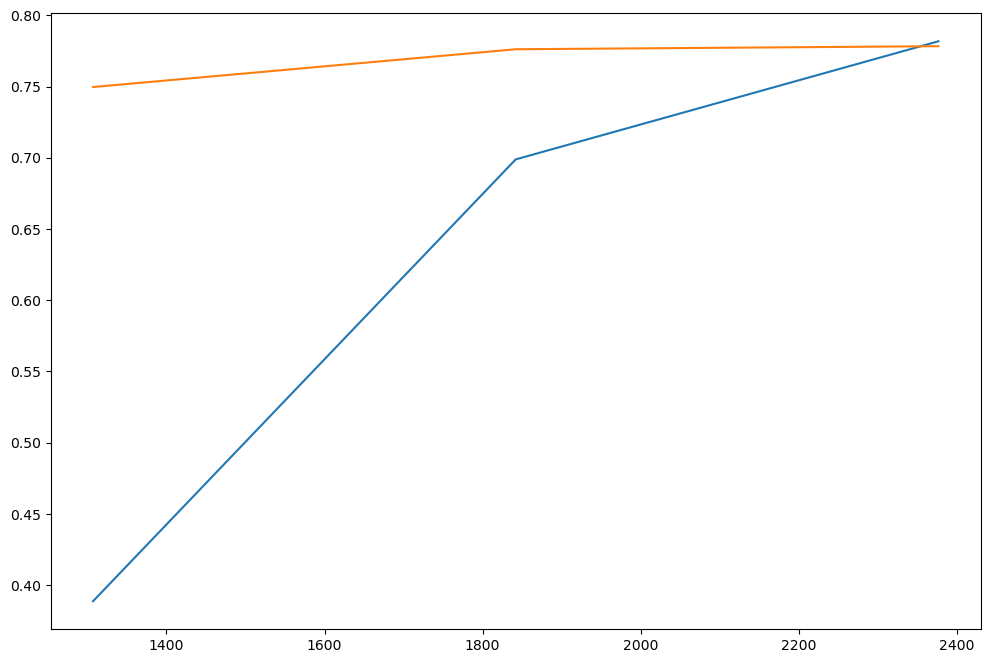

In [45]:
evaluation(model_grid, X_train_down, y_train_down)

In [46]:
def model_with_rfe(model, X_train, y_train):
    rfe_model = RFE(estimator = model, verbose=0)
    rfe_model.fit(X_train, y_train)
    mask = rfe_model.support_
    reduced_X = X_train.loc[:, mask]
    print(reduced_X.columns)
    return rfe_model

In [47]:
log_reg = LogisticRegression(random_state=seed)

In [48]:
rfe_log_reg = model_with_rfe(log_reg, X_train_down, y_train_down)

Index(['ancienneté', 'lignes_multiples', 'type_internet', 'sécurité_internet',
       'assistance_technique', 'streaming_TV', 'streaming_films',
       'type_contrat', 'total_facturé'],
      dtype='object')


[[752 279]
 [ 80 291]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1031
           1       0.51      0.78      0.62       371

    accuracy                           0.74      1402
   macro avg       0.71      0.76      0.71      1402
weighted avg       0.80      0.74      0.76      1402



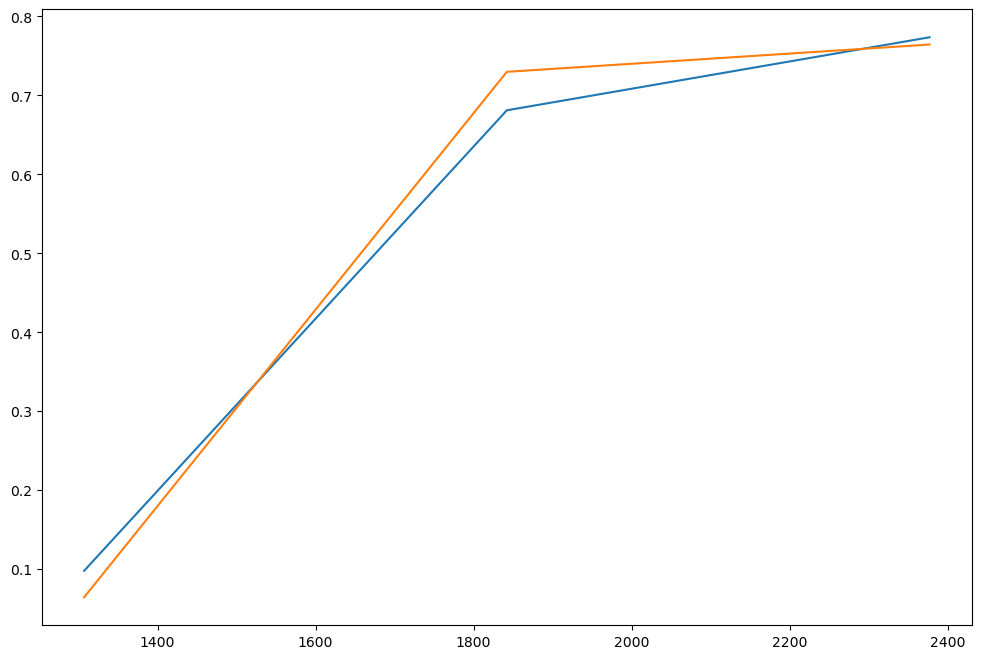

In [49]:
evaluation(rfe_log_reg, X_train_down, y_train_down)

Apres toute modification, on retient que le meilleurs model est le model de Regression Logistique sans GridSearch CV, et sans RFE

In [50]:
model_final = LogisticRegression

In [51]:
import joblib
joblib.dump(value = model_final, filename = 'Telco_Customer_Churn')

['Telco_Customer_Churn']

# 7. Conclusion

### 📊 **Évaluation du modèle de prédiction de la résiliation client**

Dans ce projet, nous avons développé un modèle visant à **prédire la résiliation de clients (churn)** à partir du jeu de données **Telco Customer Churn**. L’objectif principal est d’identifier les abonnés les plus susceptibles de rompre leur contrat, afin de permettre à l’entreprise de mener des actions préventives ciblées.

Après l’exploration de plusieurs approches, le **modèle de régression logistique** a été retenu pour sa **simplicité, sa rapidité d'exécution et sa capacité d'interprétation**. Il affiche un **F1-score moyen pondéré de 0.76**, avec un **rappel de 0.80** sur la classe minoritaire (les clients ayant effectivement résilié), ce qui est essentiel dans une problématique où le coût d’un faux négatif est élevé.

---

### ⚙️ **Méthodologie adoptée**

* Afin de **gérer le déséquilibre des classes**, nous avons appliqué la technique de **RandomUnderSampler**. Cela a permis d’équilibrer les effectifs entre les clients churn et non churn, et ainsi de **mieux former le modèle sur la classe minoritaire** sans biaiser l’apprentissage.
* Une **optimisation par GridSearchCV** a été conduite sur les hyperparamètres clés (`C`, `penalty`, `solver`, `class_weight`). Cependant, les gains en performance sont restés **marginaux**, indiquant une **stabilité du modèle** dès sa configuration de base.
* Une tentative de **sélection de variables par RFE (Recursive Feature Elimination)** a également été réalisée. Les résultats obtenus **n'ont pas permis d’améliorer la performance du modèle**, ce qui confirme que l'ensemble des variables initiales retenues étaient déjà informatives.

---

### ✅ **Pourquoi ce modèle est adapté à notre problème**

* **Lisible et explicable** : Les coefficients de la régression permettent de **comprendre les facteurs influençant la résiliation**.
* **Rapide à entraîner et à déployer**, ce qui le rend idéal pour une intégration dans un outil métier.
* Grâce à `class_weight='balanced'` et à l’application du **RandomUnderSampler**, le modèle reste **performant même sur une classe minoritaire**.

---

### ⚠️ **Limites et perspectives**

* Malgré l’optimisation des hyperparamètres et la sélection de variables, **les performances n’ont pas significativement évolué**, ce qui suggère que **la régression logistique atteint rapidement ses limites** sur ce jeu de données.
* Le **taux d’erreurs sur les clients réellement en churn (faux négatifs)** peut avoir un **impact métier direct**, car il risque de laisser passer des clients à risque sans déclencher d’actions préventives.

---

### 💼 **Impact métier**

* Ce modèle peut être **intégré dans un tableau de bord de scoring clients**, afin de **prioriser les campagnes de rétention**.
* Il permet aux équipes de cibler les clients les plus à risque, avec **un score facilement interprétable**.
* Il constitue une **première brique opérationnelle**, fiable, sur laquelle on pourra s’appuyer pour tester à l’avenir des modèles plus complexes (arbre de décision, XGBoost, etc.).
